In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data  = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
sns.set()

/tmp/ipython-input-7-3948015085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


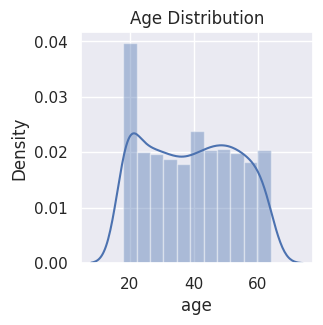

In [7]:
plt.figure(figsize=(3,3))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

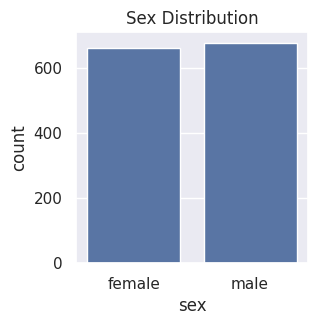

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(x ='sex',data = data)
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-9-585849784.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


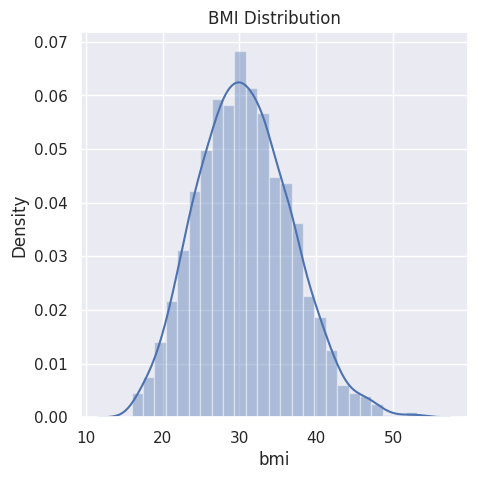

In [9]:
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

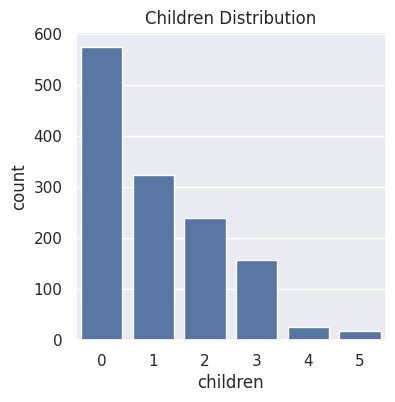

In [10]:
plt.figure(figsize = (4,4))
sns.countplot(x= 'children',data = data)
plt.title('Children Distribution')
plt.show()

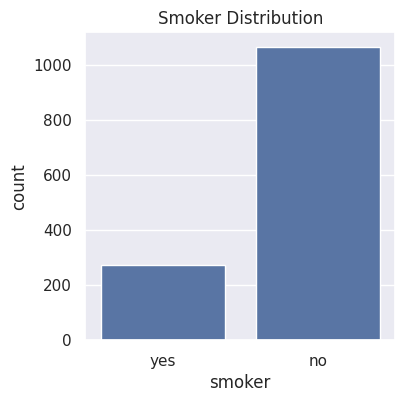

In [11]:
plt.figure(figsize = (4,4))
sns.countplot(x= 'smoker',data = data)
plt.title('Smoker Distribution')
plt.show()

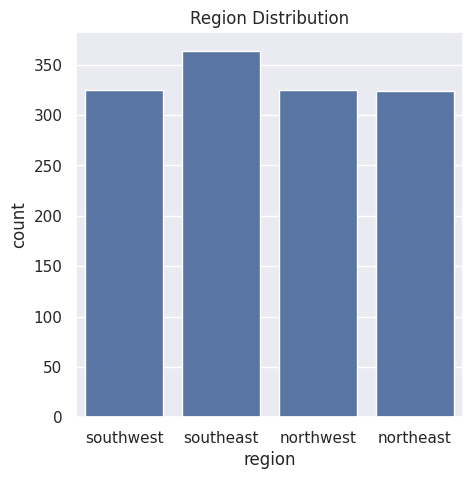

In [12]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'region',data = data)
plt.title('Region Distribution')
plt.show()

<Figure size 500x500 with 0 Axes>

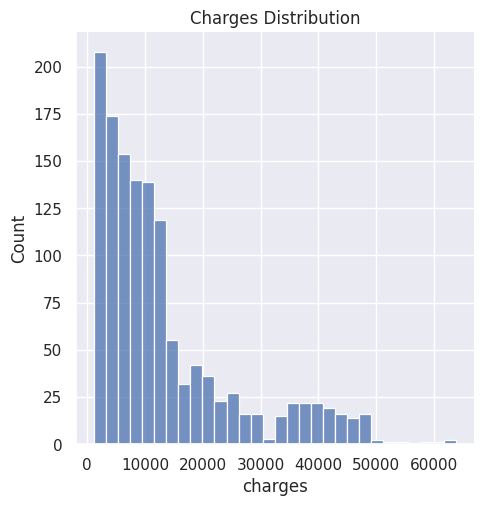

In [13]:
plt.figure(figsize=(5,5))
sns.displot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [14]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
data.head()

/tmp/ipython-input-14-1550152822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-14-1550152822.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-14-1550152822.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [15]:
X = data.drop(columns='charges',axis=1)
Y = data['charges']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
model  = LinearRegression()
model.fit(X_train,Y_train)

prediction = model.predict(X_test)
accuracy = metrics.r2_score(Y_test,prediction)
print('Accuracy of test data:',accuracy*100,'%')

predictiontrain = model.predict(X_train)
accuracytrain = metrics.r2_score(Y_train,predictiontrain)
print('Accuracy of train data:',accuracytrain*100,'%')

Accuracy of test data: 74.47273869684075 %
Accuracy of train data: 75.1505643411174 %
